<a href="https://colab.research.google.com/github/littlecapa/datascience/blob/master/MyFirst_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installing TensorFlow
To install TensorFlow on your local machine you can use pip.
```console
pip install tensorflow
```

![alt text](https://)If you have a CUDA enabled GPU you can install the GPU version of TensorFlow. You will also need to install some other software which can be found here: https://www.tensorflow.org/install/gpu 
```console
pip install tensorflow-gpu
```

## Importing TensorFlow
The first step here is going to be to select the correct version of TensorFlow from within collabratory!


In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

import sys

from google.colab import files
import io

print(tf.version)  # make sure the version is 2.x
print(sys.version_info)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


## Daten laden

In [11]:
# Load dataset.
# It will prompt you to select a file. Click on “Choose Files” then select and upload the file. Wait for the file to be 100% uploaded.

uploaded = files.upload() # training data
dftrain = pd.read_csv(io.BytesIO(uploaded['train.csv']), sep = ';')
dftrain['y'] = dftrain['y'].str.replace(',', '.').astype(float)

dfeval = pd.read_csv(io.BytesIO(uploaded['eval.csv']), sep = ';')
dfeval['y'] = dfeval['y'].str.replace(',', '.').astype(float)



Saving eval.csv to eval (16).csv
Saving train.csv to train (17).csv


(-50.0, 50.0, -10.0, 9999999.0)

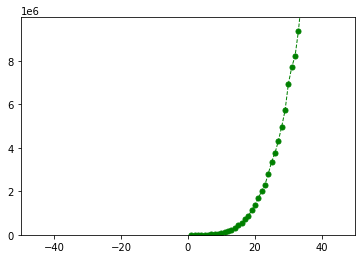

In [12]:
x = dftrain["x"]
y = dftrain["y"]
#print(x, y)
plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=5)
plt.axis([-50, 50, -10, 9999999.0])

In [13]:
y_train = dftrain.pop("y")
y_eval = dfeval.pop('y')

## Daten auswerten

## Daten kategorisieren

- Numerische Daten werden übernommen
- Für nicht nummerische Daten werden die Unique Werte gesucht

In [14]:

NUMERIC_COLUMNS = ['x']

feature_columns = []


for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


##Input Funktion

In [15]:
def make_input_fn(data_df, label_df, num_epochs=15, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


In [16]:
print(feature_columns)

[NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


##Model erstellen

In [17]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp5bszfcqz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


##Model trainieren

In [18]:
linear_est.train(train_input_fn)  # train


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp5bszfcqz/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


InvalidArgumentError: ignored

##Model evaluieren

In [12]:
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data
print (result)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-23T17:36:30Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpz_r0i4bv/model.ckpt-300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.63330s
INFO:tensorflow:Finished evaluation at 2021-01-23-17:36:31
INFO:tensorflow:Saving dict for global step 300: accuracy = 0.7689394, accuracy_baseline = 0.625, auc = 0.834068, auc_precision_recall = 0.7892343, average_loss = 0.47405815, global_step = 300, label/mean = 0.375, loss = 0.46269444, precision = 0.7111111, prediction/mean = 0.35522625, recall = 0.64646465
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 300: /tmp/tmpz_r0i4bv/model.ckpt-300
{'accuracy': 0.7689394, 'accuracy_baseline': 0.625, 'auc': 0.834068, 'auc_precision_recall': 0.7892343, 'average_loss': 0.47405815, 'label/mean': 0.375, 'loss': 0.46269444, 'precision': 0.7111111, '

##Predict

In [13]:
result = list(linear_est.predict(eval_input_fn))
i=0
right = 0
for r in result:
  print (r['probabilities'][1], y_eval[i])
  if (r['probabilities'][1] <0.5):
    if y_eval[i]==0:
      right += 1
  else:
    if y_eval[i]==1:
      right += 1
  i += 1

print (right)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpz_r0i4bv/model.ckpt-300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.060745865 0
0.2911906 0
0.6924009 1
0.5631997 1
0.22356772 1
0.7433442 1
0.5077353 0
0.09323833 0
0.5878115 0
0.7172656 1
0.6531376 1
0.093237124 0
0.8524461 1
0.34951714 0
0.8348101 1
0.46810445 0
0.14217268 0
0.81941223 1
0.2864543 1
0.07312333 0
0.09607538 0
0.0693662 0
0.64828753 1
0.05531783 0
0.6736567 0
0.54381174 0
0.13478035 0
0.1947795 0
0.20851892 1
0.83802664 1
0.10816978 0
0.76778185 1
0.16264148 0
0.6439698 1
0.2238627 0
0.07774056 1
0.12621218 0
0.09959543 0
0.8895282 1
0.07091014 0
0.67938125 1
0.0913063 1
0.37404394 0
0.23436101 0
0.15433769 0
0.81297314 1
0.09323773 0
0.2549734 0
0.35929936 1
0.33039096 0
0.079070285 0
0.19154695 0
0.04568619 0
0.074220195 0
0.10198477 1
0.08516644 0
0.14132854 0
0.94412595 1
0.15382089 0
0.07539939 0
0.

In [14]:
y_eval.head
print (y_eval[0])

0
